![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 9

Esse notebook tem por objetivo mostrar a Matemática Morfológica e alguns de seus operadores. Os operadores que serão explorados nesse notebook serão:

- Erosão
- Dilatação
- Abertura 
- Fechamento
- Gradiente Morfólogico
- Top Hat
- Bottom Hat
- Filtro passa-baixa morfológico (*MMLPF - Mathematic morphologic low-pass filter*)

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas, a definição das funções úteis e a leitura das imagens.

In [1]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[15,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs, columns, titles=None):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/columns,columns,i+1) 
        plt.imshow(list_of_imgs[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
        if titles != None: plt.title(titles[i])
            
# Funcao para calcular e exibir o histograma de uma imagem 
def pdiguide_histogram(img,nbins,show=False):
    # Essa funcao calcula o histograma de um vetor 2D (imagem grayscale)
    # com valores inteiros entre 0-255.
    # Essa imagem retorna um vetor 1D com o histograma e os pontos 
    # que representam o bin_edges para plotagem do histograma.
    # Caso show seja verdadeiro ela mesmo irá plotar o histograma
    h, bin_edges = np.histogram(img.ravel(), nbins,(0,255))
    if show:
        w=256./nbins
        bin_centers = bin_edges[1:]-(w/2)
        plt.bar(bin_centers, h, width=w)
    
    return h, bin_edges

In [3]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


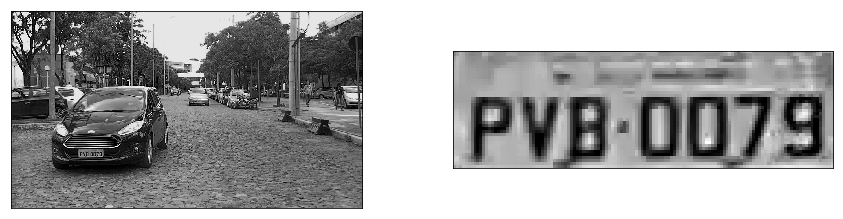

In [4]:
# Utilizando somente a imagem 0 
im_car = img[0]
im_plate = im_car[760:800,370:500] #Recorte da placa para a imagem 8

plt.figure(figsize=[15,8]) 
pdiguide_show([im_car,im_plate],2)

### Morfologia Matemática

A morfologia matemática iniciou-se em 1964 com os pesquisadores franceses Georges
Matheron e Jean Serr. Desde então, constitui de importante ferramenta no PDI, ganhando
força por sua simplicidade de implementação (FACON, 2011).

A base dessa matemática está formulada sobre o elemento estruturante e sobre
as operações dilatação e erosão. O elemento estruturante é a matriz que interage com os
objetos da imagem alterando sua aparência e sua forma. As características mais importantes
desse elemento são a sua forma e seu tamanho. A morfologia matemática em sua busca
avaliar se o elemento estruturante está ou não está contido no objeto da imagem.

#### Erosão e Dilatação

As operações morfológicas mais básicas são: a erosão e a dilatação. A erosão remove
pixels dos limites de um objeto na imagem, enquanto a dilatação adiciona pixels a essas
bordas. Esse efeito é melhor evidenciado em imagens binárias com objeto em branco e fundo em preto. Entretanto, alguns dessas operações podem ser efetuadas em imagens em tons de cinza.

#### Abertura e Fechamento 

A abertura é utilizada para remover pequenos objetos de uma
imagem preservando a forma e o tamanho dos objetos grandes. Por sua vez o fechamento
é utilizado para unificar elementos, eliminando os vazios entre eles. Da mesma forma, esse efeito é observado em imagens binárias com objeto em branco e fundo preto.

#### Gradiente Morfológico

Além da extração de ruídos e objetos indesejados, como também unificação e
divisão de regiões, a morfologia matemática pode ser utilizada para extrair bordas de uma
imagem. Para isso, faz uso do operador gradiente morfológico. Esse operador aplica sobre
a imagem uma dilatação e isoladamente uma erosão, em seguida, efetua a subtração do
resultado da dilatação pelo resultado da erosão. Observa-se que um dos efeitos da dilatação
é a expansão do objeto, principalmente, em um cenário binário, quando esse é expresso
pela cor branca e o fundo é preto. Já a erosão contrai a imagem nessa situação. Assim ao
se efetuar a subtração obtém-se a região de fronteira do objeto.

#### Top Hat e Bottom Hat

Além disso, pode-se realçar o contraste de imagens em tons de cinza aplicando os
operadores top-hat e bottom-hat. A operação top-hat é definida como sendo a abertura
subtraída da imagem original, enquanto o bottom-hat é o fechamento subtraído da imagem
original. A primeira destaca objetos claros sobre fundos escuros, enquanto que a segunda
destaca objetos escuros sobre fundos claros. O realce de contraste é feito ao se aplicar
a diferença entre o top-hat e o bottom-hat somado a imagem original (GONZALEZ;
WOODS, 2006; PEDRINI; SCHWARTZ, 2008).

#### Filtro passa-baixa morfológico

Este filtro, baseado nas operações morfológicas de bottom-hat e top-hat, é definido como um filtro passa baixa (MMLPF - *Mathematic Morphologic Low-Pass Filter*), e tem como funções principais: aumentar o contraste na imagem sem importar a variação de luz presente, suavizar a imagem e ser robusto a sombras. O filtro é definido pela equação:

$$
MMLPF(f) = f + THT(f) - BHT(f)
$$

Aqui, $f$ representa  a  imagem  de  entrada  em  escala  de  cinza, $THT$ simboliza a transformada morfológica top-hat e $BHT$ a transformada morfológica bottom-hat. 

### Referências

https://repositorio.ufsc.br/bitstream/handle/123456789/186149/PEAS0258-D.pdf?sequence=-1&isAllowed=y